# 라이브러리 로드 및 기본 세팅

In [1]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

# 데이콘 점수

In [4]:
# 자체 점수 : 0.7082714530655433
# 제출 점수(제출 날짜) : 0.6959007606(2022-01-12 12:31:13)

# 설정

In [5]:
# cat
# probability_threshold : 0.3893079137802018
# one_hot_max_size = 2

# iterations = 1000
# 순서형 특성 수치형으로 지정(4개)
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [6]:
# 제거된 특성(9개)
# 'id',
# 'contents_open_dt',
# 'contents_rn'
# 'person_prefer_f',
# 'person_prefer_g',
# 'h_m_match_yn',
# 'h_s_match_yn',
# 'contents_attribute_a',
# 'contents_attribute_k'

# 데이터 불러오기

In [7]:
# train = pd.read_csv('../data/df_train.csv')
# test = pd.read_csv('../data/df_test.csv')
train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_train.csv')
test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_test.csv')

# 데이터 확인

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [9]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [11]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


# 필요 데이터 추출

## 훈련에 의미가 적은 열 제거

In [12]:
# 제거된 특성(9개)
# 'id',
# 'contents_open_dt',
# 'contents_rn'
# 'person_prefer_f',
# 'person_prefer_g',
# 'h_m_match_yn',
# 'h_s_match_yn',
# 'contents_attribute_a',
# 'contents_attribute_k'

In [13]:
# 삭제할 특성
pop_col = ['id',
'contents_open_dt',
'contents_rn',
'person_prefer_f',
'person_prefer_g',
'h_m_match_yn',
'h_s_match_yn',
'contents_attribute_a',
'contents_attribute_k']
len(pop_col)

9

In [14]:
train = train.drop(pop_col, axis=1) 
test = test.drop(pop_col, axis=1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   person_attribute_a      501951 non-null  int64
 5   person_attribute_a_1    501951 non-null  int64
 6   person_attribute_b      501951 non-null  int64
 7   person_prefer_c         501951 non-null  int64
 8   person_prefer_d_1       501951 non-null  int64
 9   person_prefer_d_2       501951 non-null  int64
 10  person_prefer_d_3       501951 non-null  int64
 11  person_prefer_e         501951 non-null  int64
 12  person_prefer_h_1       501951 non-null  int64
 13  person_prefer_h_2       501951 non-null  int64
 14  person_prefer_h_3       501951 non-null  int64
 15  

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   person_attribute_a      46404 non-null  int64
 5   person_attribute_a_1    46404 non-null  int64
 6   person_attribute_b      46404 non-null  int64
 7   person_prefer_c         46404 non-null  int64
 8   person_prefer_d_1       46404 non-null  int64
 9   person_prefer_d_2       46404 non-null  int64
 10  person_prefer_d_3       46404 non-null  int64
 11  person_prefer_e         46404 non-null  int64
 12  person_prefer_h_1       46404 non-null  int64
 13  person_prefer_h_2       46404 non-null  int64
 14  person_prefer_h_3       46404 non-null  int64
 15  contents_attribute_

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [17]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train = train.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,1,4,3,5,275,370,369,8,4,95,59,3,10,2,1,1608,275,1,4,139,618822,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,False,False,False,True,1,3,4,1,114,181,175,4,131,101,96,1,5,1,1,1608,275,1,4,133,571659,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,False,False,False,True,2,0,3,5,464,175,452,3,54,263,56,3,10,2,1,1600,94,1,4,53,399816,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,False,False,False,True,2,0,2,5,703,705,704,3,72,227,2,1,5,1,1,1608,275,5,3,74,827967,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,True,True,True,False,1,3,4,5,275,370,369,4,214,210,209,1,10,2,1,1608,275,1,4,74,831614,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [18]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test = test.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,1,1,2,1,857,851,1227,4,263,56,49,1,10,2,1,1147,839,1,5,263,393790,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,False,False,False,True,2,0,2,2,683,1086,662,2,258,263,49,1,5,1,1,1611,278,1,4,263,394058,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,True,False,False,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,1,1,1817,490,3,4,177,1002061,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,True,False,False,True,1,2,2,5,114,181,175,4,177,170,171,3,5,1,1,101,150,5,3,177,1000813,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,True,False,False,True,1,6,4,5,1082,1078,1056,5,178,177,4,3,5,1,1,985,1097,1,4,177,111146,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


## 카테고리형 특성으로 지정할 특성

In [19]:
# 원본 데이터에서 순서형 특성
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [20]:
# 순서형 특성 수치형으로 지정 : ⭕
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [21]:
cat_f = train.columns.tolist()
cat_f.remove('person_attribute_a_a')
cat_f.remove('person_attribute_b')
cat_f.remove('person_prefer_e')
cat_f.remove('contents_attribute_e')
cat_f.remove('target')

In [22]:
# 54 - 5 = 49개
len(cat_f)

49

# train, test 셋 분리

In [23]:
train.shape

(501951, 54)

In [24]:
X = train.drop(['target'], axis=1)
X.shape

(501951, 53)

In [25]:
y = train[['target']]
y.shape

(501951, 1)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, shuffle=True, stratify=y)

In [27]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((376463, 53), (125488, 53), (376463, 1), (125488, 1))

# 모델 훈련/예측

In [28]:
cat = CatBoostClassifier(random_state=0, iterations=1000, task_type='GPU', early_stopping_rounds=50,
                         cat_features=cat_f, eval_metric='F1', one_hot_max_size=2)

In [29]:
cat.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100)
# 2m 20s

Learning rate set to 0.043012
0:	learn: 0.6025012	test: 0.6074100	best: 0.6074100 (0)	total: 392ms	remaining: 6m 31s
100:	learn: 0.6487390	test: 0.6624649	best: 0.6625438 (94)	total: 34.7s	remaining: 5m 8s
200:	learn: 0.6580619	test: 0.6747537	best: 0.6749092 (199)	total: 1m 9s	remaining: 4m 37s
300:	learn: 0.6624591	test: 0.6783612	best: 0.6790650 (293)	total: 1m 44s	remaining: 4m 3s
bestTest = 0.6790650499
bestIteration = 293
Shrink model to first 294 iterations.


In [30]:
cat.best_score_

{'learn': {'F1': 0.6640712943218009, 'Logloss': 0.6235601174617426},
 'validation': {'F1': 0.6790650498811632, 'Logloss': 0.6111865526982659}}

## 자체 평가

### 기본 평가

In [31]:
val_pred = cat.predict(X_val)
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64     62777
           1       0.65      0.72      0.68     62711

    accuracy                           0.66    125488
   macro avg       0.66      0.66      0.66    125488
weighted avg       0.66      0.66      0.66    125488



In [32]:
f1_score_raw = f1_score(y_val, val_pred)
f1_score_raw

0.6790650498811632

In [33]:
val_pred_proba = cat.predict_proba(X_val)

In [34]:
val_pred_proba

array([[0.52168792, 0.47831208],
       [0.34881888, 0.65118112],
       [0.51008173, 0.48991827],
       ...,
       [0.76447495, 0.23552505],
       [0.84151245, 0.15848755],
       [0.44794553, 0.55205447]])

In [35]:
val_pred_proba[:,1]

array([0.47831208, 0.65118112, 0.48991827, ..., 0.23552505, 0.15848755,
       0.55205447])

### Precision and Recall Curve

In [36]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, val_pred_proba[:,1])

threshold_boundary = thresholds.shape[0]

pr = pd.DataFrame({
    'Precision': precisions[:threshold_boundary], 
    'Recall': recalls[:threshold_boundary], 
    'Threshold': thresholds
})
pr

,Precision,Recall,Threshold
0,0.499880,1.000000,0.020156
1,0.499876,0.999984,0.020160
2,0.499880,0.999984,0.020445
3,0.499884,0.999984,0.020527
4,0.499888,0.999984,0.020704
...,...,...,...
125404,1.000000,0.000080,0.888243
125405,1.000000,0.000064,0.891862
125406,1.000000,0.000048,0.892129
125407,1.000000,0.000032,0.892621


In [37]:
import matplotlib.pyplot as plt

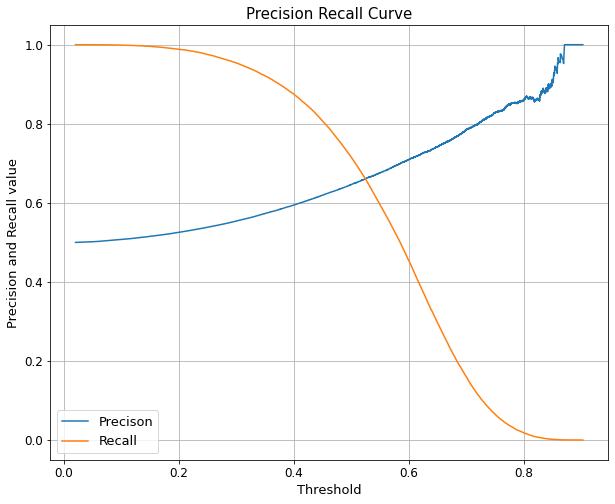

In [38]:
plt.figure(figsize=(10,8))
plt.plot(pr['Threshold'], pr['Precision'], label='Precison')
plt.plot(pr['Threshold'], pr['Recall'], label='Recall')

plt.title("Precision Recall Curve", fontdict={'size':15})
plt.xlabel('Threshold', fontsize=13)
plt.ylabel('Precision and Recall value', fontsize=13)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.legend(fontsize=13)

### threshold제한 평가

In [39]:
# threshold 최대값의 인덱스, np.argmax()
pre = precisions[:threshold_boundary]
re = recalls[:threshold_boundary]

f1 = 2 * pre * re / (pre + re)

optimal_idx = np.argmax(f1)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 31269 , threshold: 0.3893079137802018


In [40]:
val_pred_th =  (cat.predict_proba(X_val)[:,1] >= optimal_threshold)
# 1의 예측값만 불러와도 되므로 [:,1]사용
val_pred_th = val_pred_th.astype(int)
val_pred_th

array([1, 1, 1, ..., 0, 0, 1])

In [41]:
f1_score_mod = f1_score(y_val, val_pred_th)
f1_score_mod

0.7082714530655433

### threshold 적용 전 후 f1 점수 비교

In [42]:
print("threshold 적용 전 f1 score :", f1_score_raw)
print("threshold 적용 후 f1 score :", f1_score_mod)

threshold 적용 전 f1 score : 0.6790650498811632
threshold 적용 후 f1 score : 0.7082714530655433


## test 예측

In [43]:
pred =  (cat.predict_proba(test)[:,1] >= optimal_threshold)
# 1의 예측값만 불러와도 되므로 [:,1]사용
pred = pred.astype(int)
pred

array([1, 0, 1, ..., 1, 1, 1])

# 제출파일 불러오기

In [44]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


In [45]:
sub.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# 제출파일 생성

In [46]:
sub['target'] = pred
sub['target'].value_counts()

1    35516
0    10888
Name: target, dtype: int64

In [47]:
file_ver = '4.4'
# sub.to_csv(f'sub_ver{file_ver}.csv', index=False)
sub.to_csv(f'/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver{file_ver}.csv', index=False)

# 코드 마지막